<a href="https://colab.research.google.com/github/venkateshdukuru/-CodeClause_project_datascience_intern/blob/main/Price_Recommendation_for_Online_Sellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
df=pd.read_csv("/content/data.csv", encoding= 'unicode_escape')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info

<bound method DataFrame.info of       InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
49907    540538     47422     ASSORTED MONKEY SUCTION CUP HOOK         5   
49908    540538     21976       PACK OF 60 MUSHROOM CAKE CASES         9   
49909    540538     84991          60 TEATIME FAIRY CAKE CASES         5   
49910    540538     20969    RED FLORAL FELTCRAFT SHOULDER BAG         1   
49911    540538     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         1   

          InvoiceDate  UnitPrice  CustomerID         Co

In [ ]:
df.tail

<bound method NDFrame.tail of       InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
49907    540538     47422     ASSORTED MONKEY SUCTION CUP HOOK         5   
49908    540538     21976       PACK OF 60 MUSHROOM CAKE CASES         9   
49909    540538     84991          60 TEATIME FAIRY CAKE CASES         5   
49910    540538     20969    RED FLORAL FELTCRAFT SHOULDER BAG         1   
49911    540538     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         1   

          InvoiceDate  UnitPrice  CustomerID         Coun

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,49912.000000,49911.000000,32030.000000
mean,8.294218,6.423712,15426.016422
std,55.576019,166.653120,1752.300279
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.250000,14057.000000
50%,2.000000,2.510000,15464.000000
75%,8.000000,4.250000,17041.000000
max,2880.000000,16888.020000,18283.000000


In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.columns.values

array(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'], dtype=object)

In [ ]:
df.isnull().sum()


InvoiceNo          0
StockCode          0
Description      142
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     17882
Country            1
dtype: int64

In [ ]:
df.shape

(49912, 8)

In [ ]:
df.duplicated().sum()

537

In [ ]:
df.dropna(subset=['CustomerID'],axis=0,inplace=True)
df.shape

(32030, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.drop_duplicates(subset=None, keep=False, inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['InvoiceNo'].value_counts()
df['StockCode'].value_counts()
df['Description'].value_counts()
df['InvoiceDate'].value_counts()
df['UnitPrice'].value_counts()
df['CustomerID'].value_counts()
df['Country'].value_counts()

United Kingdom     28089
Germany              809
France               608
EIRE                 377
Spain                174
Norway               147
Portugal             141
Belgium               99
Australia             81
Cyprus                81
Netherlands           72
Japan                 69
Switzerland           49
Italy                 42
Sweden                41
Lithuania             35
Iceland               31
Denmark               20
Channel Islands       17
Finland               17
Austria                9
Poland                 8
Israel                 2
Name: Country, dtype: int64

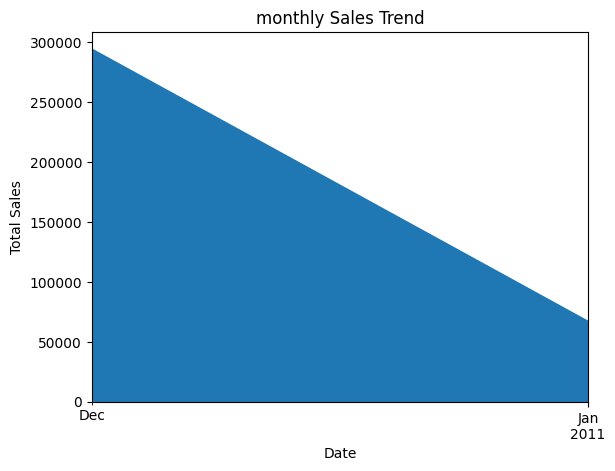

In [ ]:
import matplotlib.pyplot as plt

df.InvoiceDate = pd.to_datetime(df.InvoiceDate)

monthly_sales=df.groupby(pd.Grouper(key='InvoiceDate',freq='M'))['Quantity'].sum()

monthly_sales.plot(kind='area', stacked=True)

plt.title('monthly Sales Trend')

plt.xlabel('Date')

plt.ylabel('Total Sales')

plt.show()

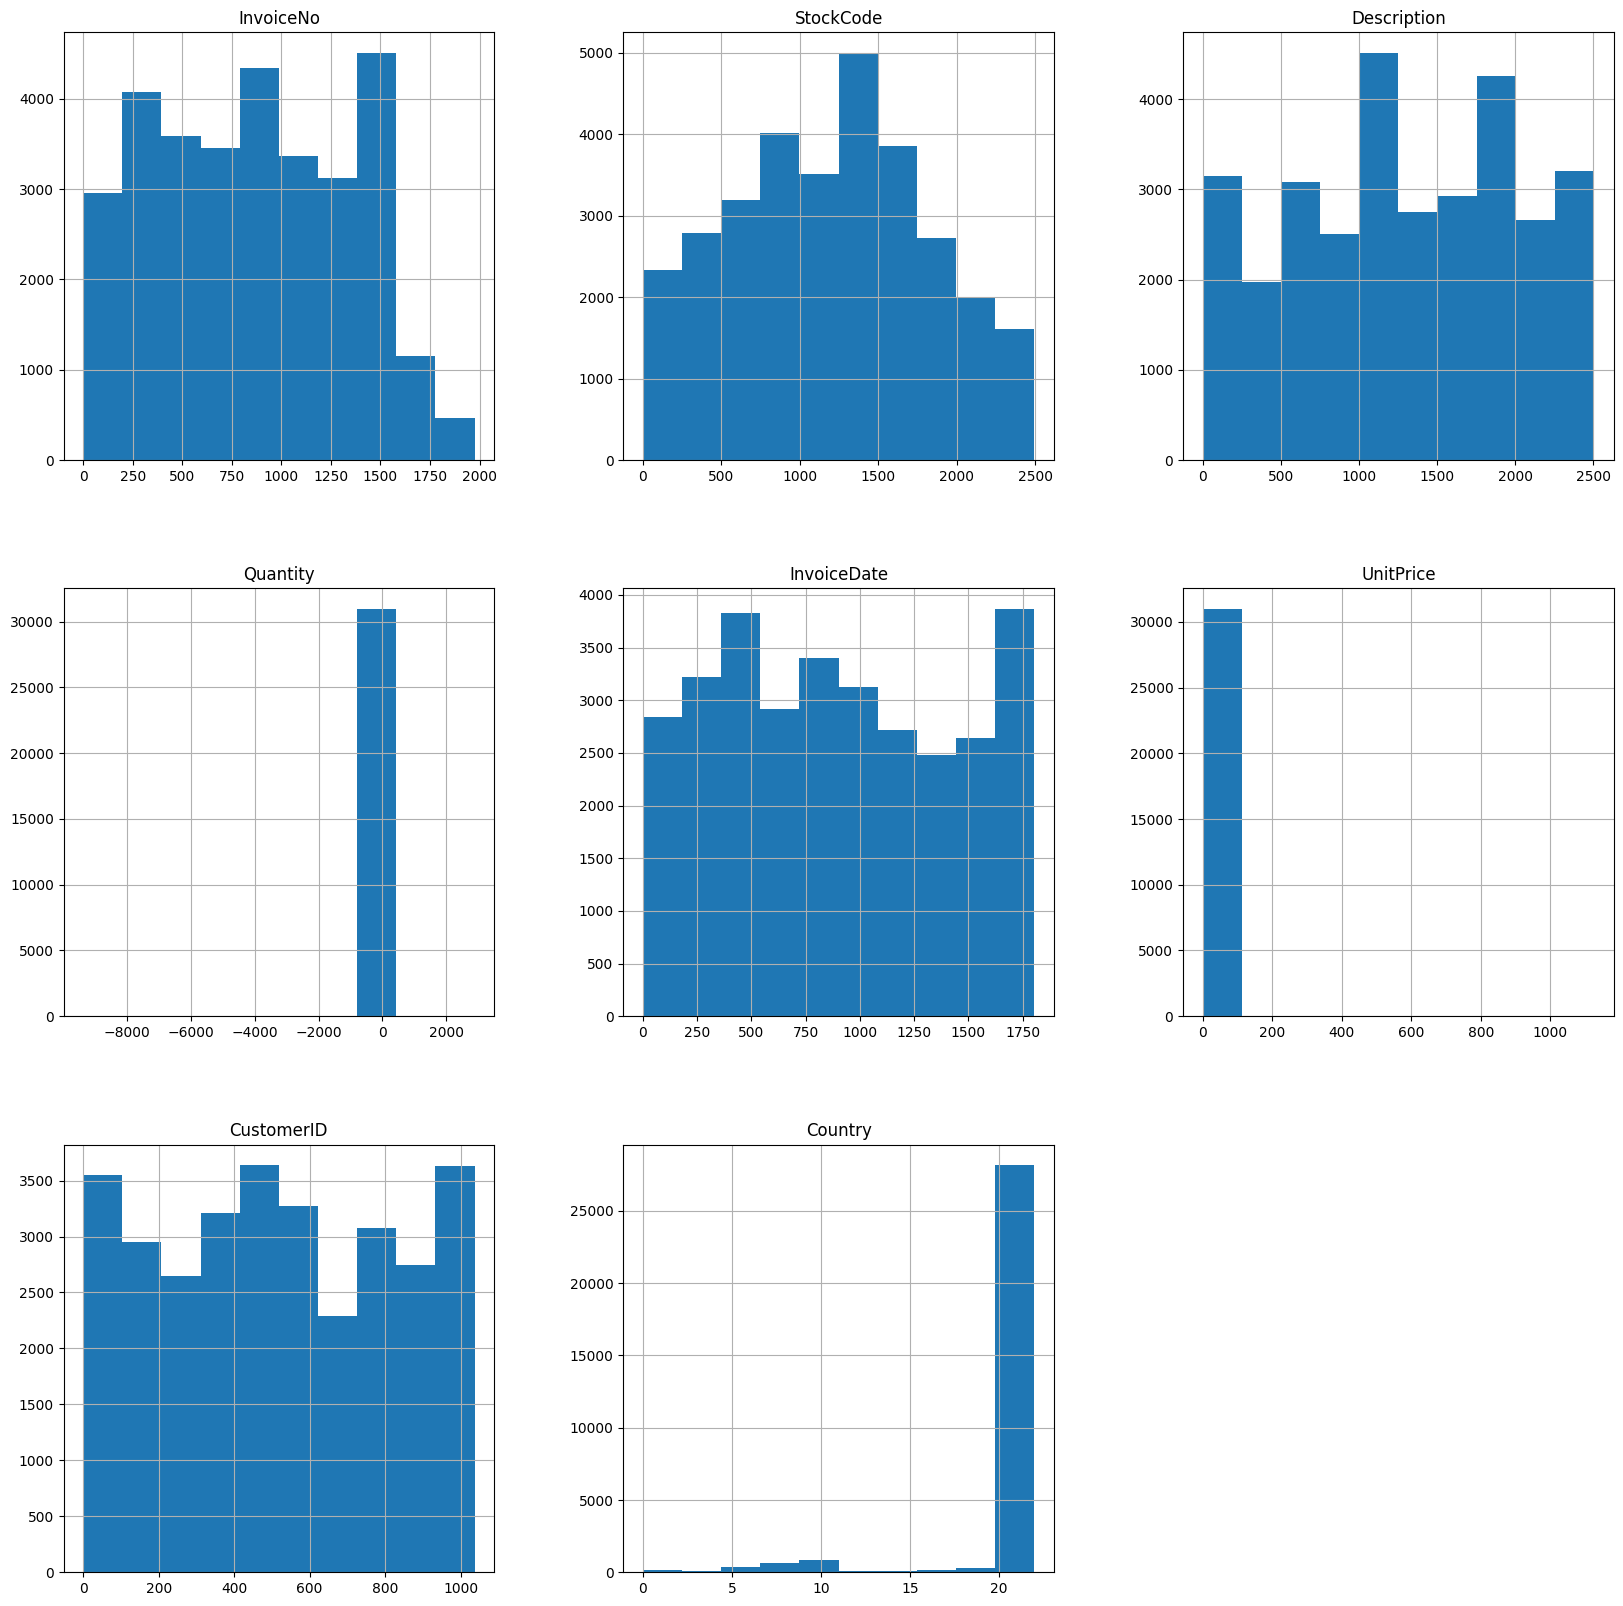

In [ ]:
df.hist(figsize=(20,20))
plt.show()

<Axes: >

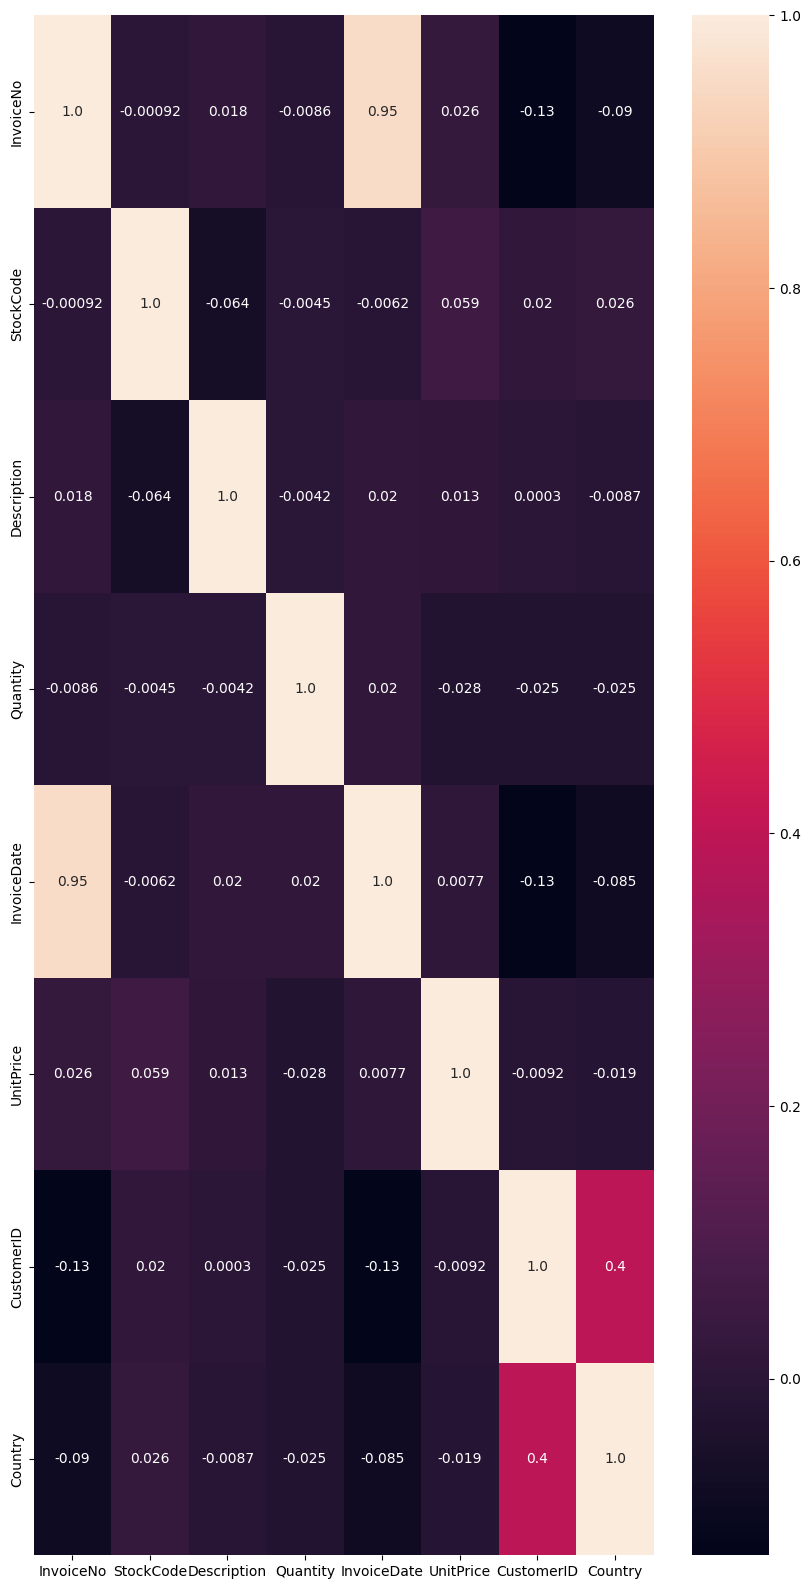

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,20))

sns.heatmap(df.corr(), annot=True, fmt=".2")

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['InvoiceNo'] = encoder.fit_transform(df['InvoiceNo'])

InvoiceNo  = {index : label for index, label in enumerate(encoder.classes_)}

InvoiceNo 

{0: '536365',
 1: '536366',
 2: '536367',
 3: '536368',
 4: '536369',
 5: '536370',
 6: '536371',
 7: '536372',
 8: '536373',
 9: '536374',
 10: '536375',
 11: '536376',
 12: '536377',
 13: '536378',
 14: '536380',
 15: '536381',
 16: '536382',
 17: '536384',
 18: '536385',
 19: '536386',
 20: '536387',
 21: '536388',
 22: '536389',
 23: '536390',
 24: '536392',
 25: '536393',
 26: '536394',
 27: '536395',
 28: '536396',
 29: '536397',
 30: '536398',
 31: '536399',
 32: '536400',
 33: '536401',
 34: '536402',
 35: '536403',
 36: '536404',
 37: '536405',
 38: '536406',
 39: '536407',
 40: '536408',
 41: '536409',
 42: '536412',
 43: '536415',
 44: '536416',
 45: '536420',
 46: '536423',
 47: '536425',
 48: '536437',
 49: '536446',
 50: '536460',
 51: '536463',
 52: '536464',
 53: '536466',
 54: '536477',
 55: '536488',
 56: '536500',
 57: '536502',
 58: '536508',
 59: '536514',
 60: '536520',
 61: '536521',
 62: '536522',
 63: '536523',
 64: '536524',
 65: '536525',
 66: '536526',
 67: 

In [ ]:
df['StockCode'] = encoder.fit_transform(df['StockCode'])

StockCode  = {index : label for index, label in enumerate(encoder.classes_)}

StockCode 

{0: '10002',
 1: '10120',
 2: '10123C',
 3: '10124A',
 4: '10124G',
 5: '10125',
 6: '10133',
 7: '10135',
 8: '11001',
 9: '15034',
 10: '15036',
 11: '15039',
 12: '15044A',
 13: '15044B',
 14: '15044C',
 15: '15056BL',
 16: '15056N',
 17: '15056P',
 18: '15058A',
 19: '15058B',
 20: '15060B',
 21: '16008',
 22: '16010',
 23: '16011',
 24: '16012',
 25: '16014',
 26: '16015',
 27: '16016',
 28: '16033',
 29: '16045',
 30: '16046',
 31: '16048',
 32: '16054',
 33: '16156L',
 34: '16156S',
 35: '16161M',
 36: '16161P',
 37: '16161U',
 38: '16168M',
 39: '16169K',
 40: '16169M',
 41: '16169N',
 42: '16169P',
 43: '16202E',
 44: '16206B',
 45: '16207A',
 46: '16216',
 47: '16218',
 48: '16219',
 49: '16225',
 50: '16235',
 51: '16236',
 52: '16237',
 53: '16238',
 54: '16258A',
 55: '17003',
 56: '17007B',
 57: '17011F',
 58: '17012A',
 59: '17012B',
 60: '17012C',
 61: '17012D',
 62: '17012E',
 63: '17012F',
 64: '17013D',
 65: '17014A',
 66: '17021',
 67: '17038',
 68: '17084J',
 69: '

In [ ]:
df['Description'] = encoder.fit_transform(df['Description'])

Description  = {index : label for index, label in enumerate(encoder.classes_)}

Description 

{0: ' 4 PURPLE FLOCK DINNER CANDLES',
 1: ' OVAL WALL MIRROR DIAMANTE ',
 2: ' SET 2 TEA TOWELS I LOVE LONDON ',
 3: '10 COLOUR SPACEBOY PEN',
 4: '12 COLOURED PARTY BALLOONS',
 5: '12 DAISY PEGS IN WOOD BOX',
 6: '12 EGG HOUSE PAINTED WOOD',
 7: '12 IVORY ROSE PEG PLACE SETTINGS',
 8: '12 MESSAGE CARDS WITH ENVELOPES',
 9: '12 PENCIL SMALL TUBE WOODLAND',
 10: '12 PENCILS SMALL TUBE RED RETROSPOT',
 11: '12 PENCILS SMALL TUBE SKULL',
 12: '12 PENCILS TALL TUBE POSY',
 13: '12 PENCILS TALL TUBE RED RETROSPOT',
 14: '12 PENCILS TALL TUBE SKULLS',
 15: '12 PENCILS TALL TUBE WOODLAND',
 16: '12 PINK ROSE PEG PLACE SETTINGS',
 17: '12 RED ROSE PEG PLACE SETTINGS',
 18: '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
 19: '20 DOLLY PEGS RETROSPOT',
 20: '200 BENDY SKULL STRAWS',
 21: '200 RED + WHITE BENDY STRAWS',
 22: '3 GARDENIA MORRIS BOXED CANDLES',
 23: '3 HEARTS HANGING DECORATION RUSTIC',
 24: '3 HOOK HANGER MAGIC GARDEN',
 25: '3 HOOK PHOTO SHELF ANTIQUE WHITE',
 26: '3 PIECE SPACEBOY COOKI

In [ ]:
df['InvoiceDate'] = encoder.fit_transform(df['InvoiceDate'])

InvoiceDate  = {index : label for index, label in enumerate(encoder.classes_)}

InvoiceDate

{0: numpy.datetime64('2010-12-01T08:26:00.000000000'),
 1: numpy.datetime64('2010-12-01T08:28:00.000000000'),
 2: numpy.datetime64('2010-12-01T08:34:00.000000000'),
 3: numpy.datetime64('2010-12-01T08:35:00.000000000'),
 4: numpy.datetime64('2010-12-01T08:45:00.000000000'),
 5: numpy.datetime64('2010-12-01T09:00:00.000000000'),
 6: numpy.datetime64('2010-12-01T09:01:00.000000000'),
 7: numpy.datetime64('2010-12-01T09:02:00.000000000'),
 8: numpy.datetime64('2010-12-01T09:09:00.000000000'),
 9: numpy.datetime64('2010-12-01T09:32:00.000000000'),
 10: numpy.datetime64('2010-12-01T09:34:00.000000000'),
 11: numpy.datetime64('2010-12-01T09:37:00.000000000'),
 12: numpy.datetime64('2010-12-01T09:41:00.000000000'),
 13: numpy.datetime64('2010-12-01T09:45:00.000000000'),
 14: numpy.datetime64('2010-12-01T09:49:00.000000000'),
 15: numpy.datetime64('2010-12-01T09:53:00.000000000'),
 16: numpy.datetime64('2010-12-01T09:56:00.000000000'),
 17: numpy.datetime64('2010-12-01T09:57:00.000000000'),
 1

In [ ]:
df['Country'] = encoder.fit_transform(df['Country'])

Country  = {index : label for index, label in enumerate(encoder.classes_)}

Country

{0: 'Australia',
 1: 'Austria',
 2: 'Belgium',
 3: 'Channel Islands',
 4: 'Cyprus',
 5: 'Denmark',
 6: 'EIRE',
 7: 'Finland',
 8: 'France',
 9: 'Germany',
 10: 'Iceland',
 11: 'Israel',
 12: 'Italy',
 13: 'Japan',
 14: 'Lithuania',
 15: 'Netherlands',
 16: 'Norway',
 17: 'Poland',
 18: 'Portugal',
 19: 'Spain',
 20: 'Sweden',
 21: 'Switzerland',
 22: 'United Kingdom'}

In [ ]:
df['CustomerID'] = encoder.fit_transform(df['CustomerID'])

CustomerID  = {index : label for index, label in enumerate(encoder.classes_)}

CustomerID

{0: 12347.0,
 1: 12348.0,
 2: 12370.0,
 3: 12377.0,
 4: 12383.0,
 5: 12386.0,
 6: 12395.0,
 7: 12413.0,
 8: 12415.0,
 9: 12417.0,
 10: 12423.0,
 11: 12427.0,
 12: 12429.0,
 13: 12431.0,
 14: 12433.0,
 15: 12434.0,
 16: 12441.0,
 17: 12471.0,
 18: 12472.0,
 19: 12474.0,
 20: 12476.0,
 21: 12480.0,
 22: 12481.0,
 23: 12483.0,
 24: 12484.0,
 25: 12489.0,
 26: 12494.0,
 27: 12501.0,
 28: 12503.0,
 29: 12515.0,
 30: 12530.0,
 31: 12540.0,
 32: 12551.0,
 33: 12557.0,
 34: 12567.0,
 35: 12577.0,
 36: 12578.0,
 37: 12583.0,
 38: 12585.0,
 39: 12586.0,
 40: 12600.0,
 41: 12605.0,
 42: 12621.0,
 43: 12647.0,
 44: 12649.0,
 45: 12651.0,
 46: 12662.0,
 47: 12666.0,
 48: 12668.0,
 49: 12678.0,
 50: 12681.0,
 51: 12682.0,
 52: 12683.0,
 53: 12686.0,
 54: 12691.0,
 55: 12705.0,
 56: 12708.0,
 57: 12709.0,
 58: 12712.0,
 59: 12720.0,
 60: 12721.0,
 61: 12725.0,
 62: 12726.0,
 63: 12731.0,
 64: 12734.0,
 65: 12735.0,
 66: 12738.0,
 67: 12747.0,
 68: 12748.0,
 69: 12753.0,
 70: 12755.0,
 71: 12763.0,
 7

In [ ]:
y = df['Country'].values
X = df.drop(columns = ['Country','CustomerID'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.00000000e+00 9.15797915e-01 9.61676647e-01 7.65196078e-01
  0.00000000e+00 2.26465364e-03]
 [0.00000000e+00 7.40978348e-01 9.63672655e-01 7.65196078e-01
  0.00000000e+00 3.01065719e-03]
 [0.00000000e+00 8.01122694e-01 2.48702595e-01 7.65359477e-01
  0.00000000e+00 2.44227353e-03]
 [0.00000000e+00 7.86287089e-01 4.83832335e-01 7.65196078e-01
  0.00000000e+00 3.01065719e-03]
 [0.00000000e+00 7.85886127e-01 7.30538922e-01 7.65196078e-01
  0.00000000e+00 3.01065719e-03]
 [0.00000000e+00 5.91018444e-01 7.79241517e-01 7.64869281e-01
  0.00000000e+00 6.79396092e-03]
 [0.00000000e+00 2.63432237e-01 3.92015968e-01 7.65196078e-01
  0.00000000e+00 3.77442274e-03]
 [5.06329114e-04 5.45308741e-01 4.23153693e-01 7.65196078e-01
  5.54323725e-04 1.64298401e-03]
 [5.06329114e-04 5.44907779e-01 4.21956088e-01 7.65196078e-01
  5.54323725e-04 1.64298401e-03]
 [1.01265823e-03 8.54049719e-01 6.06786427e-02 7.67320261e-01
  1.10864745e-03 1.50088810e-03]]
y 
 [22 22 22 22 22 22 22 22 22 22]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=0)

In [ ]:
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (30988, 6)
x_test shape is: (30, 6)
y_train shape is: (30988,)
y_test shape is: (30,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])

DecisionTreeClassifierModel Train Score is :  0.9063831160449206
DecisionTreeClassifierModel Test Score is :  0.8333333333333334
DecisionTreeClassifierModel Classes are :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
DecisionTreeClassifierModel feature importances are :  [0.07718856 0.18984434 0.         0.21728194 0.4975398  0.01814537]
----------------------------------------------------
Predicted Value for DecisionTreeClassifierModel is :  [22 22 22 22 22 22 22 22 22 22]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[2.01091640e-03 0.00000000e+00 1.43636886e-03 4.30910658e-04
  0.00000000e+00 2.72910083e-03 2.12582591e-02 0.00000000e+00
  3.28928469e-02 3.21746625e-02 3.30364838e-03 0.00000000e+00
  2.01091640e-03 9.33639759e-03 5.02729101e-03 1.43636886e-04
  2.02528009e-02 1.00545820e-03 1.03418558e-02 7.18184430e-04
  0.00000000e+00 5.74547544e-04 8.54352198e-01]
 [8.09615744e-04 1.24556268e-04 8.09615744e-04 8.71893878e-04
  2.30

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  25


In [ ]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)


F1 Score is :  0.8333333333333334
